In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx

In [2]:
choice = np.random.permutation([i for i in range(1,68)])
choice = sorted (choice[0:25])
print('choosed data:',choice)

choosed data: [1, 3, 4, 5, 6, 7, 9, 14, 17, 20, 24, 26, 28, 32, 34, 36, 42, 50, 51, 56, 57, 59, 64, 66, 67]


In [3]:
image = []
im_train = []
im_test = []
for index in choice:
    temp = ['PIE/'+str(index)+'/'+str(i+1)+'.jpg' for i in range(0,170)]
    number = round(len(temp)*0.7)
    id_train = np.random.permutation([i for i in range(0,len(temp))])
    id_train = sorted(id_train[0:number])
    train = []
    test = []
    for i in range(0,len(temp)):
        if i in id_train:
            train.append(temp[i])
        else:
            test.append(temp[i])
    im_train.extend(train)
    im_test.extend(test)
    image.extend(temp)

print('image size:',len(image))
print('train image size:',len(im_train))
print('test image size:',len(im_test))


image size: 4250
train image size: 2975
test image size: 1275


In [4]:
path = './own/image'
path_processed = './own/processed'

for mainDir, subDir, fileList in os.walk(path):
    for file in fileList:
        currentPath = os.path.join(mainDir, file)
        print(currentPath)
        if file != '.DS_Store':
            original = cv2.imread(filename=currentPath)
            original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY) 
            processedImage = cv2.resize(original, (32,32))

            new_mainDir = path_processed + mainDir.split(path)[-1]
            if not os.path.exists(new_mainDir):
                os.makedirs(new_mainDir)
            cv2.imwrite(os.path.join(new_mainDir, file), processedImage)


./own/image/.DS_Store
./own/image/8.jpg
./own/image/9.jpg
./own/image/10.jpg
./own/image/4.jpg
./own/image/5.jpg
./own/image/7.jpg
./own/image/6.jpg
./own/image/2.jpg
./own/image/3.jpg
./own/image/1.jpg


In [5]:
self = ['own/processed/'+str(i+1)+'.jpg' for i in range (0,10)]
number = round(len(self)*0.7)
a = np.random.permutation([i for i in range(0,len(self))])
a = sorted(a[0:number])
self_train = []
self_test = []
for i in range(0,len(self)):
    if i in a:
        self_train.append(self[i])
    else:
        self_test.append(self[i])
print('self image size:',len(self))
print('self train image size:',len(self_train))
print('self test image size:',len(self_test))


self image size: 10
self train image size: 7
self test image size: 3


In [6]:
label = []
train_set = []

whole_train = im_train+self_train
for i in range(len(whole_train)):
    path = whole_train[i]
    path2 = path.split('/')
    image = cv2.imread(path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    train_set.append(image)
    
    if path2[0]=='PIE':
        label.append(path2[1])
    elif path2[0]=='own':
        label.append(path2[0])
train_set = np.array(train_set)
train_set = train_set.reshape(len(train_set), -1)
label = np.array(label)

own_train = []
own_label = []
for i in range(len(self_train)):
    path = self_train[i]
    path2 = path.split('/')
    image = cv2.imread(path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    own_train.append(image)
    
    if path2[0]=='PIE':
        own_label.append(path2[1])
    elif path2[0]=='own':
        own_label.append(path2[0])
own_train = np.array(own_train)
own_label = np.array(own_label)
print(own_label)
print(train_set.shape)

['own' 'own' 'own' 'own' 'own' 'own' 'own']
(2982, 1024)


In [7]:
def PCA_nD(train_set,k):
    m = train_set.mean(axis=0)
    temp = train_set - m
    
    cov_mat = np.cov(temp.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
    eigenvectors = eigenvectors.real
    sorted_result = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[sorted_result]
    eigenvectors = eigenvectors[:, sorted_result]
    eigenvalues = eigenvalues[0:k]
    face = eigenvectors[:,:k]
    return eigenvalues, face

In [8]:
eigenvalues, eigenfaces = PCA_nD(train_set,2)
p = np.dot(train_set, eigenfaces)

In [9]:
print(p.shape)

(2982, 2)


In [10]:
p_self = p[2975:2982,:]
print(p_self.shape)

(7, 2)


In [11]:
p_pie = p[0:2975,:]
p_choice = np.random.permutation([i for i in range(0,2975)])
p_choice = sorted (p_choice[0:500])
p_choice = p_pie[p_choice,:]
print(p_choice.shape)

(500, 2)


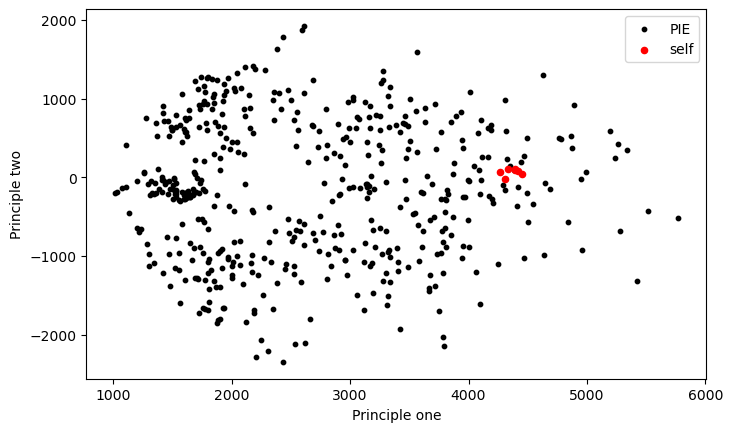

In [12]:
fig = plt.figure(figsize=plt.figaspect(0.6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(p_choice[0:500, 0], p_choice[0:500, 1], s = 10, c = 'black', label='PIE')
ax.scatter(p_self[0:7, 0], p_self[0:7, 1], s = 20, c = 'red', label='self')
ax.set_xlabel('Principle one')
ax.set_ylabel('Principle two')
ax.legend()
plt.show()

In [13]:
#3D case
eigenvalues_3d, eigenfaces_3d = PCA_nD(train_set,3)
p_3d = np.dot(train_set, eigenfaces_3d)

In [14]:
print(p_3d.shape)

(2982, 3)


In [15]:
p_self3d = p_3d[2975:2982,:]
print(p_self3d.shape)

(7, 3)


In [16]:
p_pie3d = p_3d[0:2975,:]
p_choice3d = np.random.permutation([i for i in range(0,2975)])
p_choice3d = sorted (p_choice3d[0:500])
p_choice3d = p_pie3d[p_choice3d,:]
print(p_choice3d.shape)

(500, 3)


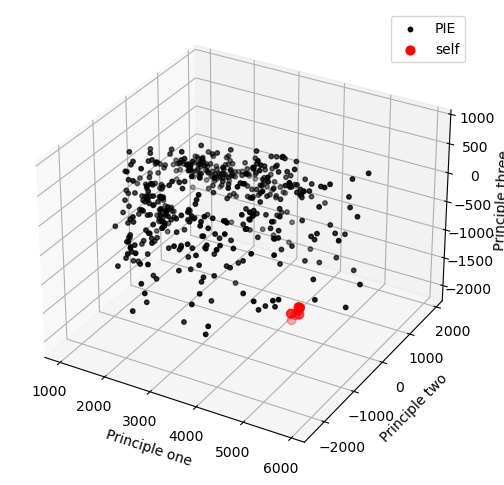

In [17]:
fig = plt.figure(1, figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(p_choice3d[0:500, 0], p_choice3d[0:500, 1], p_choice3d[0:500, 2], s = 10, c = 'black', label='PIE')
ax.scatter(p_self3d[0:7, 0], p_self3d[0:7, 1], p_self3d[0:7, 2], s = 40, c = 'red', label='self')
ax.set_xlabel('Principle one')
ax.set_ylabel('Principle two')
ax.set_zlabel('Principle three')
ax.legend()
plt.show()

In [24]:
f3d = eigenfaces_3d
print(f3d.shape)

(1024, 3)


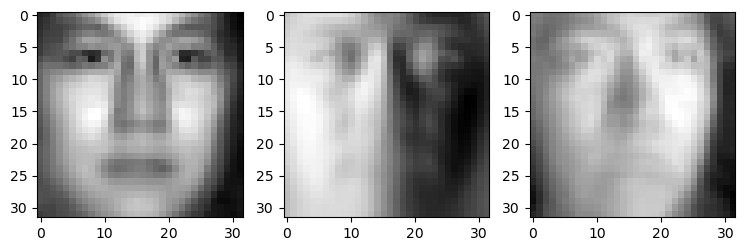

In [26]:
f1 = np.reshape(f3d[:, 0].T.real, (32, 32))
f2 = np.reshape(f3d[:, 1].T.real, (32, 32))
f3 = np.reshape(f3d[:, 2].T.real, (32, 32))
plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
plt.imshow(f1,cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(f2,cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(f3,cmap='gray')

In [27]:
label = []
train_set = []

whole_train = im_train+self_train
for i in range(len(whole_train)):
    path = whole_train[i]
    path2 = path.split('/')
    image = cv2.imread(path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    train_set.append(image)
    
    if path2[0]=='PIE':
        label.append(path2[1])
    elif path2[0]=='own':
        label.append(path2[0])
train_set = np.array(train_set)
train_set = train_set.reshape(len(train_set), -1)
label = np.array(label)

test_label = []
test_set = []

whole_test = im_test+self_test
for i in range(len(whole_test)):
    path = whole_test[i]
    path2 = path.split('/')
    image = cv2.imread(path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    test_set.append(image)
    
    if path2[0]=='PIE':
        test_label.append(path2[1])
    elif path2[0]=='own':
        test_label.append(path2[0])
test_set = np.array(test_set)
test_set = test_set.reshape(len(test_set), -1)
test_label = np.array(test_label)

print(train_set.shape)
print(test_set.shape)
print(label.shape)
print(test_label.shape)

(2982, 1024)
(1278, 1024)
(2982,)
(1278,)


In [36]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def knn(X_train, y_train, X_test, k):
    y_pred = []

    for test_point in X_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        sorted_indices = np.argsort(distances)
        k_nearest_neighbors = [y_train[i] for i in sorted_indices[:k]]
        y_pred.append(max(set(k_nearest_neighbors), key=k_nearest_neighbors.count))
    
    return np.array(y_pred)


def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total


In [37]:
ev40, ef40 = PCA_nD(train_set,40)
train40 = np.dot(train_set, ef40)
test40 = np.dot(test_set, ef40)
y_pred = knn(train40, label, test40, 3)
acc = accuracy(test_label, y_pred)
print(f"Accuracy: {acc*100:.2f}%")

Accuracy: 81.92%


In [38]:
ev80, ef80 = PCA_nD(train_set,80)
train80 = np.dot(train_set, ef80)
test80 = np.dot(test_set, ef80)
y_pred80 = knn(train80, label, test80, 3)
acc80 = accuracy(test_label, y_pred80)
print(f"Accuracy: {acc80*100:.2f}%")

Accuracy: 85.45%


In [41]:
ev200, ef200 = PCA_nD(train_set,200)
train200 = np.dot(train_set, ef200)
test200 = np.dot(test_set, ef200)
y_pred200 = knn(train200, label, test200, 3)
acc200 = accuracy(test_label, y_pred200)
print(f"Accuracy: {acc200*100:.2f}%")

Accuracy: 87.72%


In [43]:
own_train = []
own_label = []
for i in range(len(self_train)):
    path = self_train[i]
    path2 = path.split('/')
    image = cv2.imread(path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    own_train.append(image)
    
    if path2[0]=='PIE':
        own_label.append(path2[1])
    elif path2[0]=='own':
        own_label.append(path2[0])
own_train = np.array(own_train).reshape(len(own_train), -1)
own_label = np.array(own_label)

own_test = []
own_labeltest = []
for i in range(len(self_test)):
    path = self_test[i]
    path2 = path.split('/')
    image = cv2.imread(path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    own_test.append(image)
    
    if path2[0]=='PIE':
        own_labeltest.append(path2[1])
    elif path2[0]=='own':
        own_labeltest.append(path2[0])
own_test = np.array(own_test).reshape(len(own_test), -1)
own_labeltest = np.array(own_labeltest)

print(own_train.shape)
print(own_test.shape)
print(own_label.shape)
print(own_labeltest.shape)

(7, 1024)
(3, 1024)
(7,)
(3,)


In [44]:
ev40, ef40 = PCA_nD(own_train,40)
train40 = np.dot(own_train, ef40)
test40 = np.dot(own_test, ef40)
y_pred = knn(train40, own_label, test40, 3)
acc = accuracy(own_labeltest, y_pred)
print(f"Accuracy: {acc*100:.2f}%")

Accuracy: 100.00%


In [45]:
ev80, ef80 = PCA_nD(own_train,80)
train80 = np.dot(own_train, ef80)
test80 = np.dot(own_test, ef80)
y_pred = knn(train80, own_label, test80, 3)
acc = accuracy(own_labeltest, y_pred)
print(f"Accuracy: {acc*100:.2f}%")

Accuracy: 100.00%


In [47]:
ev200, ef200 = PCA_nD(own_train,200)
train200 = np.dot(own_train, ef200)
test200 = np.dot(own_test, ef200)
y_pred = knn(train200, own_label, test200, 3)
acc = accuracy(own_labeltest, y_pred)
print(f"Accuracy: {acc*100:.2f}%")

Accuracy: 100.00%
